<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [199]:
# Используем распределение из примера "cosine"
cosine_rv = sts.cosine()
sample_cosine = cosine_rv.rvs(100)

In [200]:
# И для сравнения используем распределение genhalflogistic
genhalflogistic = sts.genhalflogistic(0.7)
sample_genhalflogistic = genhalflogistic.rvs(100)

In [201]:
real_mean_cosine = cosine_rv.mean() # настоящее среднее случайной величины
real_var_cosine = cosine_rv.var() # настоящая дисперсия случайной величины

print('настоящее среднее случайной величины:', real_mean_cosine)
print('настоящая дисперсия случайной величины:', real_var_cosine)

настоящее среднее случайной величины: 0.0
настоящая дисперсия случайной величины: 1.2898681336964528


In [202]:
real_mean_genhalflogistic = genhalflogistic.mean() # настоящее среднее случайной величины
real_var_genhalflogistic = genhalflogistic.var() # настоящая дисперсия случайной величины

print('настоящее среднее случайной величины:', real_mean_genhalflogistic)
print('настоящая дисперсия случайной величины:', real_var_genhalflogistic)

настоящее среднее случайной величины: 0.7413425860067259
настоящая дисперсия случайной величины: 0.1468534974329917


### Постройте гистограмму выборки и теоретическую плотность распределения

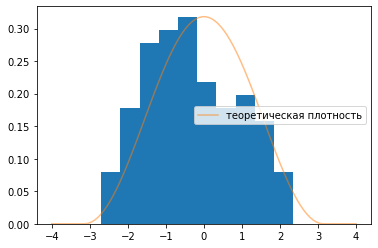

In [203]:
# гистограмма выборки и теоретическая плотность распределения для cosine
plt.hist(sample_cosine, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

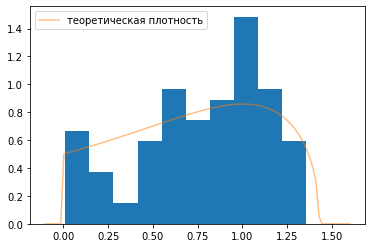

In [204]:
# гистограмма выборки и теоретическая плотность распределения для genhalflogistic
plt.hist(sample_genhalflogistic, density=True)
x = np.linspace(-0.1, 1.6, 100)
pdf = genhalflogistic.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [205]:
sample_mean_cosine = sample_cosine.mean() # выборочное среднее
print('выборочное среднее:', sample_mean_cosine)
sample_var_cosine = sample_cosine.var() # выборочная дисперсия
print('выборочная дисперсия:', sample_var_cosine)

выборочное среднее: -0.28919142006403087
выборочная дисперсия: 1.431782077706372


In [206]:
sample_mean_genhalflogistic = sample_genhalflogistic.mean() # выборочное среднее
print('выборочное среднее:', sample_mean_genhalflogistic)
sample_var_genhalflogistic = sample_genhalflogistic.var() # выборочная дисперсия
print('выборочная дисперсия:', sample_var_genhalflogistic)

выборочное среднее: 0.7793277935325134
выборочная дисперсия: 0.12832668475458603


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

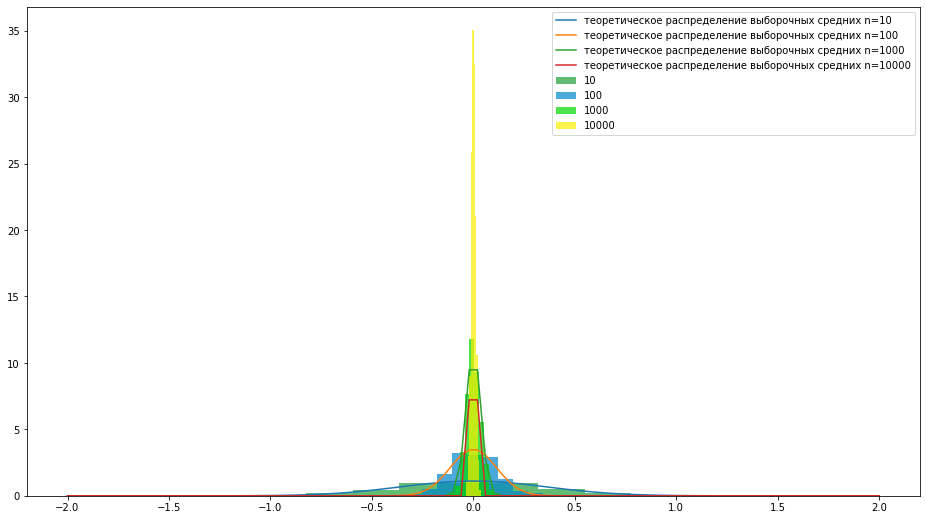

In [207]:
plt.figure(figsize=(16,9))
color = ['#21A038','#0087CD','#00D900', '#FAED00', '#42E3B4' ,'#21BA72']
a = 0
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.7, color=color[a], density=True)
    a += 1
    x = np.linspace(-2, 2, 100)
    # сгенерируем график нормального распределения
    norm_cos_rv = sts.norm(loc=real_mean_cosine, scale=cosine_rv.std() / np.sqrt(N))
    pdf = norm_cos_rv.pdf(x)
    plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend(['теоретическое распределение выборочных средних n=10',
            'теоретическое распределение выборочных средних n=100',
            'теоретическое распределение выборочных средних n=1000',
            'теоретическое распределение выборочных средних n=10000',
            '10', '100', '1000', '10000'])

plt.show()

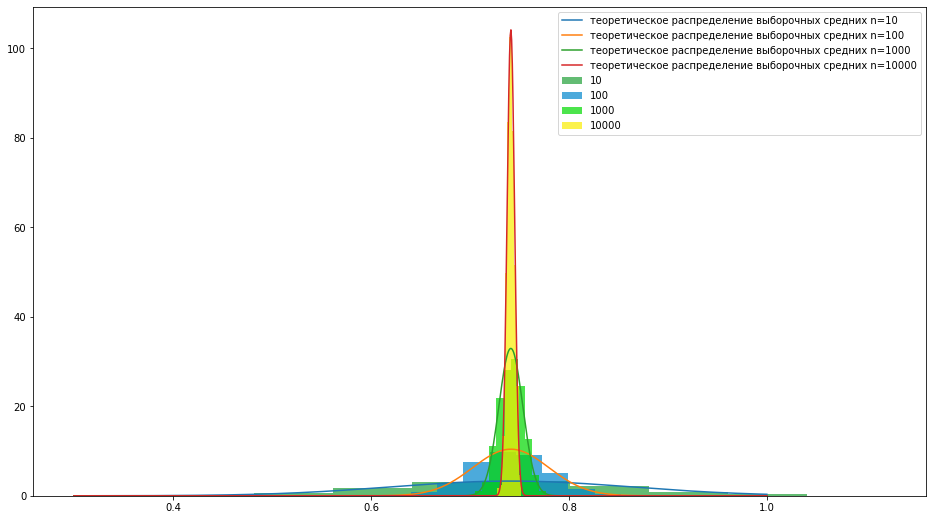

In [208]:
plt.figure(figsize=(16, 9))
color = ['#21A038', '#0087CD', '#00D900', '#FAED00', '#42E3B4', '#21BA72']
a = 0
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(genhalflogistic.rvs(N)))
    plt.hist(means, alpha=0.7, color=color[a], density=True)
    a += 1
    x = np.linspace(0.3, 1, 1000)
    # сгенерируем график нормального распределения
    norm_g_rv = sts.norm(loc=real_mean_genhalflogistic, scale=genhalflogistic.std() / np.sqrt(N))
    pdf = norm_g_rv.pdf(x)
    plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend(['теоретическое распределение выборочных средних n=10',
            'теоретическое распределение выборочных средних n=100',
            'теоретическое распределение выборочных средних n=1000',
            'теоретическое распределение выборочных средних n=10000',
            '10', '100', '1000', '10000'])

plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:** работает хорошо. На двух графиках различных распределений средняя величина стремится к настоящему среднему случайной величины соответствующих распределений, а с ростом выборки увеличивается и точность.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [220]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [210]:
# Формируем два набора данных(кто ушел и кто не ушел)
churn_t = df['total day calls'].loc[df['churn'] == True]

In [211]:
churn_f = df['total day calls'].loc[df['churn'] == False]

In [212]:
# Смотрим статистику по полученным данным
churn_t.describe()

count    483.000000
mean     101.335404
std       21.582307
min        0.000000
25%       87.500000
50%      103.000000
75%      116.500000
max      165.000000
Name: total day calls, dtype: float64

In [213]:
churn_f.describe()

count    2850.000000
mean      100.283158
std        19.801157
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       163.000000
Name: total day calls, dtype: float64

In [214]:
# Используя ЦПТ формируем подвыборки. Т.к. в основной выборке всего 483 записи, поэтому подвыборки сделал по 100
mean_churn_t = []
n = 100
for i in range(100000):
    mean_churn_t += [churn_t.sample(n).mean()]

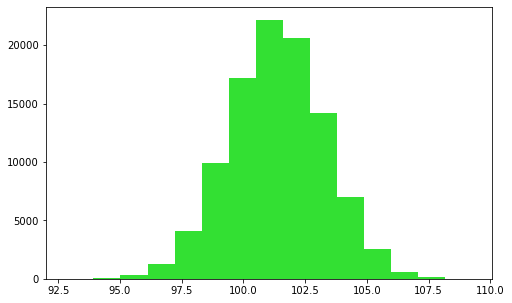

101.35154559999998


In [215]:
# Для наглядности строим график, выводим полученное среднее
plt.figure(figsize=(8, 5))
plt.hist(mean_churn_t, alpha=0.8, color='#00D900', bins=15)
plt.show()
print(np.mean(mean_churn_t))

In [216]:
# Параметр ddof=1 отдельно не указывался, т.к. в методе std библиотеки pandas он указан по умолчанию
print("Доверительный интервал для среднего по ЦПТ, расчитанный по формуле (ушедшие): \n[{}, {}] ".format(
    np.mean(mean_churn_t) - 1.96 * churn_t.std() / np.sqrt(n-1),
    np.mean(mean_churn_t) + 1.96 * churn_t.std() / np.sqrt(n-1)
))

print("Доверительный интервал для среднего по ЦПТ методом _zconfint_generic (ушедшие): \n{} ".format(
    ssw._zconfint_generic(np.mean(mean_churn_t),  churn_t.std(), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по ЦПТ, расчитанный по формуле (ушедшие): 
[97.1001027616222, 105.60298843837776] 
Доверительный интервал для среднего по ЦПТ методом _zconfint_generic (ушедшие): 
(99.99818865408743, 102.70490254591253) 


In [217]:
# Тех, кто не ушел значительно больше, что позволяет сделать подвыборки больше, чем в случае с теми, кто ушел
mean_churn_f = []
n = 300
for i in range(100000):
    mean_churn_f += [churn_f.sample(n).mean()]

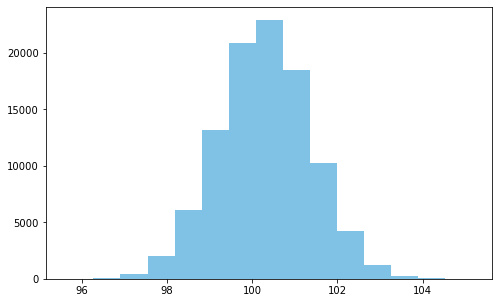

100.28287016666667


In [218]:
plt.figure(figsize=(8, 5))
plt.hist(mean_churn_f, alpha=0.5, color='#0087CD', bins=15)
plt.show()
print(np.mean(mean_churn_f))

In [219]:
# По такому же сценарию, как и выше, строим доверительные интервалы по тем, кто не ушел
print("Доверительный интервал для среднего по ЦПТ, расчитанный по формуле (те, кто остался): \n[{}, {}] ".format(
    np.mean(mean_churn_f) - 1.96 * churn_f.std() / np.sqrt(n-1),
    np.mean(mean_churn_f) + 1.96 * churn_f.std() / np.sqrt(n-1)
))

print("Доверительный интервал для среднего по ЦПТ методом _zconfint_generic (те, кто остался): \n{} ".format(
    ssw._zconfint_generic(np.mean(mean_churn_f),  churn_f.std(), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по ЦПТ, расчитанный по формуле (те, кто остался): 
[98.03841443852116, 102.52732589481218] 
Доверительный интервал для среднего по ЦПТ методом _zconfint_generic (те, кто остался): 
(99.04120341467107, 101.52453691866226) 


Исходя из расчетов можно сделать вывод, что доверительные интервалы, расчитанные через _zconfint_generic,
позволяют с большей точностью определить границы среднего значения.